<a href="https://colab.research.google.com/github/Reagan-Reid-Git/Final-Machine-Learning-Project/blob/main/6_HAD7001_S25.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.model_selection import cross_val_predict
from imblearn.over_sampling import SMOTE, RandomOverSampler, BorderlineSMOTE
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report,auc, roc_auc_score, roc_curve, recall_score, make_scorer, fbeta_score
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import warnings
import statsmodels.api as sm

In [2]:
!pip install category_encoders

import pandas as pd
import numpy as np
import warnings
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt
# from sklearn.metrics import RocCurveDisplay, auc, roc_curve
from sklearn.metrics import roc_auc_score, accuracy_score
import plotly.express as px
from category_encoders import OneHotEncoder, TargetEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 2.6 MB/s eta 0:00:00


In [3]:
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score, accuracy_score, confusion_matrix
from sklearn.model_selection import StratifiedKFold, GridSearchCV, train_test_split
from imblearn.combine import SMOTEENN, SMOTETomek


In [ ]:
!pip install --upgrade scikit-learn

In [4]:
from google.colab import drive
import os

drive.mount('/content/drive')

data_path = '/content/drive/MyDrive/final_ml.csv'

Mounted at /content/drive


In [5]:
df= pd.read_csv('/content/drive/MyDrive/final_ml.csv')
df

,SEQN,DXATRST,DXATRTV,DXXANFM,DXXANLM,DXXANTOM,DXXGYFM,DXXGYLM,DXXGYTOM,DXXAGRAT,...,EDUCATION,HEALTHINSURANCE,FAMILYPIR,EVERSMOKER,SMOKER,BMI,PERMTH_EXM,MORTSTAT,surveyyr,mortstat15yr
0,21005,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,1.0,2.44,NaN,NaN,50.85,201.0,0.0,304,0.0
1,21006,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,1.0,2.47,NaN,NaN,20.78,NaN,NaN,304,NaN
2,21007,1,0.0,701.7,2207.7,2909.4,2979.1,5383.8,8362.8,0.7,...,1.0,1.0,1.60,NaN,NaN,18.43,NaN,NaN,304,NaN
3,21008,1,0.0,496.6,3243.6,3740.2,1840.6,8709.4,10550.0,0.8,...,1.0,1.0,2.75,NaN,NaN,20.65,NaN,NaN,304,NaN
4,21009,1,0.0,3657.2,5433.9,9091.2,5031.3,10900.9,15932.1,1.3,...,2.0,1.0,3.79,2.0,NaN,31.26,195.0,0.0,304,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14544,41469,1,0.0,481.3,2744.0,3225.3,2043.6,6433.8,8477.3,0.6,...,3.0,1.0,0.66,NaN,NaN,19.25,160.0,0.0,506,0.0
14545,41471,1,0.0,208.5,2033.7,2242.2,796.9,5290.8,6087.6,0.7,...,1.0,1.0,0.35,NaN,NaN,18.41,NaN,NaN,506,NaN
14546,41472,1,0.0,2422.4,4989.0,7411.4,3802.2,11073.2,14875.5,1.3,...,3.0,1.0,3.66,2.0,NaN,26.23,159.0,0.0,506,0.0
14547,41473,1,0.0,1552.2,3611.5,5163.6,3082.1,8426.0,11508.2,1.1,...,1.0,2.0,1.16,2.0,NaN,26.16,172.0,0.0,506,0.0


## **Data Cleaning**###

In [6]:
description= df.describe()
description

,SEQN,DXATRST,DXATRTV,DXXANFM,DXXANLM,DXXANTOM,DXXGYFM,DXXGYLM,DXXGYTOM,DXXAGRAT,...,EDUCATION,HEALTHINSURANCE,FAMILYPIR,EVERSMOKER,SMOKER,BMI,PERMTH_EXM,MORTSTAT,surveyyr,mortstat15yr
count,14549.000000,14549.000000,12354.000000,11824.000000,11824.000000,11824.000000,11824.000000,11824.000000,11824.000000,11824.000000,...,14546.000000,14478.000000,13827.000000,8687.000000,4171.000000,14355.000000,9798.000000,9798.000000,14549.00000,9798.00000
mean,30914.972507,1.539831,0.138821,1842.354846,3394.507612,5236.862957,3762.608914,7226.511350,10989.119646,0.961764,...,1.788189,1.229313,2.411124,1.524577,2.104052,26.422887,165.536334,0.169218,399.70321,0.16187
std,5905.555660,1.244293,0.760843,1220.001497,1208.764022,2245.859409,1812.747319,2316.036236,3493.299204,0.218703,...,0.901487,0.564221,1.599530,0.536757,0.951188,7.007374,40.194224,0.374964,100.86448,0.36835
min,21005.000000,1.000000,0.000000,102.900000,784.500000,978.400000,453.900000,1564.600000,2486.600000,0.400000,...,1.000000,1.000000,0.000000,1.000000,1.000000,12.410000,0.000000,0.000000,304.00000,0.00000
25%,25803.000000,1.000000,0.000000,823.850000,2530.775000,3528.775000,2446.350000,5627.450000,8761.350000,0.800000,...,1.000000,1.000000,1.040000,1.000000,1.000000,21.440000,162.000000,0.000000,304.00000,0.00000
50%,30613.000000,1.000000,0.000000,1640.950000,3314.700000,4997.900000,3518.000000,7139.250000,10887.450000,1.000000,...,1.000000,1.000000,2.040000,2.000000,3.000000,25.500000,175.000000,0.000000,304.00000,0.00000
75%,36017.000000,1.000000,0.000000,2597.325000,4211.900000,6715.525000,4773.775000,8803.500000,13189.100000,1.100000,...,3.000000,1.000000,3.790000,2.000000,3.000000,30.220000,190.000000,0.000000,506.00000,0.00000
max,41474.000000,5.000000,7.000000,7686.500000,8182.400000,14971.800000,12528.000000,15694.300000,24420.400000,1.900000,...,9.000000,9.000000,5.000000,9.000000,3.000000,130.210000,205.000000,1.000000,506.00000,1.00000


In [7]:
#clean BMI by excuding those who are underweight
df_clean=df.loc[df['BMI']>18.5]

# ***Analytic Sample Creation (Complete Case)***

In [8]:
# Specify the variables you want to include in the complete case analysis
variables_asample = [
   'DXXAPFAT', 'DXXGPFAT', 'BMI', 'mortstat15yr']

# Create a new DataFrame with only the specified variables
asample_var_subset = df_clean[variables_asample]

# Drop rows with any missing values in the specified variables
asample = asample_var_subset.dropna()

# Now dffp_complete contains only complete cases for the selected variables
print(asample.head())
print(asample.isna().sum())

    DXXAPFAT  DXXGPFAT    BMI  mortstat15yr
4       40.2      31.6  31.26           0.0
5       48.0      48.2  25.49           0.0
10      36.4      41.6  19.34           0.0
12      47.5      47.5  38.03           0.0
13      35.3      44.1  22.55           0.0
DXXAPFAT        0
DXXGPFAT        0
BMI             0
mortstat15yr    0
dtype: int64


In [9]:
description= asample.describe()
description

,DXXAPFAT,DXXGPFAT,BMI,mortstat15yr
count,7367.000000,7367.000000,7367.000000,7367.000000
mean,35.030257,34.495561,27.915606,0.153794
std,9.891882,9.619972,5.479043,0.360776
min,7.000000,7.700000,18.510000,0.000000
25%,28.600000,27.100000,23.870000,0.000000
50%,36.000000,34.300000,27.140000,0.000000
75%,42.300000,42.400000,31.240000,0.000000
max,59.600000,58.000000,52.850000,1.000000


In [10]:
freq_asample = asample.drop(columns=['DXXAPFAT', 'DXXGPFAT', 'BMI'])

In [11]:
for col in freq_asample.columns:
    print(f"Variable: {col}")

    # Frequency counts (including NaN if any)
    counts =freq_asample[col].value_counts

    # Percentage (normalize=True gives proportions, multiply by 100 for %)
    percents = freq_asample[col].value_counts(normalize=True) * 100

    # Combine into a small table
    freq_table = pd.DataFrame({
        'Count': counts,
        'Percent': percents.round(2)  # round to 2 decimal places
    })

    print(freq_table)

Variable: mortstat15yr
                                                          Count  Percent
mortstat15yr                                                            
0.0           <bound method IndexOpsMixin.value_counts of 4 ...    84.62
1.0           <bound method IndexOpsMixin.value_counts of 4 ...    15.38


In [12]:
con1_asample = asample.drop(columns=['mortstat15yr'])

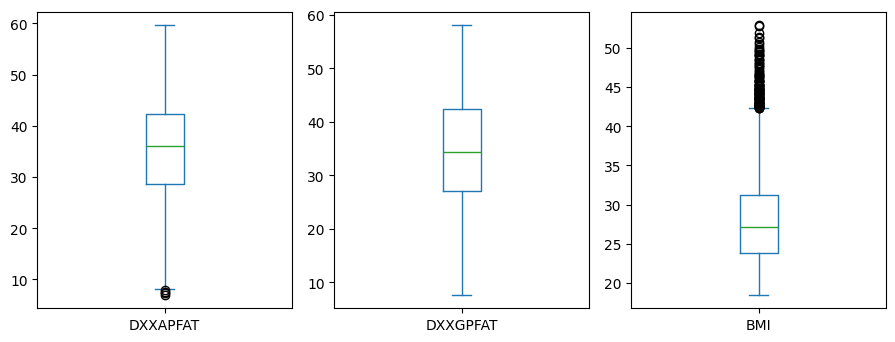

In [13]:
con1_asample.plot(kind='box', subplots=True, layout=(3, 5), figsize=(15, 10))
plt.tight_layout()
plt.show()

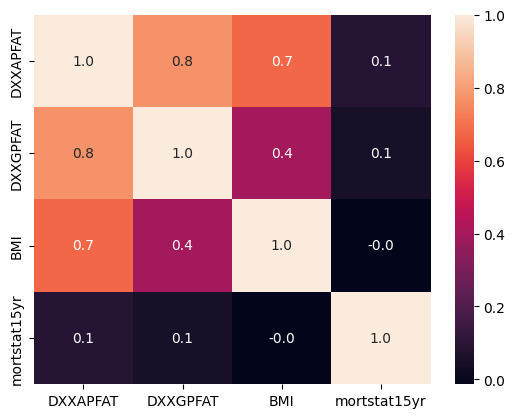

In [14]:
corr_m=asample.corr()
sns.heatmap(corr_m, annot=True, fmt=".1f")
plt.show()

In [15]:
complete_des=df_clean.dropna(subset=variables_asample).index

cc_sample=df_clean.loc[complete_des]

demo_vars= ['age','sex','ETHNIC','EDUCATION','HEALTHINSURANCE','EVERSMOKER','BMI','DXXAPFAT','DXXGPFAT','mortstat15yr']

medians= cc_sample[demo_vars].median()
print(medians)

iqr=cc_sample[demo_vars].quantile(0.75)-cc_sample[demo_vars].quantile(0.25)
print(iqr)

for var in ['sex','ETHNIC','EDUCATION','HEALTHINSURANCE','EVERSMOKER','mortstat15yr']:

    counts =cc_sample[var].value_counts (dropna=False)
    percents = cc_sample[var].value_counts(normalize=True) * 100
    props= cc_sample[var].value_counts(normalize=True, dropna=False)
    percent= props*100
    N=len(cc_sample)
    se=np.sqrt(props*(1-props)/N)
    se_percent=se*100


    freq_table = pd.DataFrame({
        'Count': counts,
        'Percent': percents.round(2),
        'SE': se_percent.round(2)
        })
    print(freq_table)


age                43.00
sex                 1.00
ETHNIC              3.00
EDUCATION           2.00
HEALTHINSURANCE     1.00
EVERSMOKER          2.00
BMI                27.14
DXXAPFAT           36.00
DXXGPFAT           34.30
mortstat15yr        0.00
dtype: float64
age                32.00
sex                 1.00
ETHNIC              2.00
EDUCATION           2.00
HEALTHINSURANCE     0.00
EVERSMOKER          1.00
BMI                 7.37
DXXAPFAT           13.70
DXXGPFAT           15.30
mortstat15yr        0.00
dtype: float64
     Count  Percent    SE
sex                      
1     3804    51.64  0.58
2     3563    48.36  0.58
        Count  Percent    SE
ETHNIC                      
3        3472    47.13  0.58
4        1691    22.95  0.49
1        1650    22.40  0.49
5         306     4.15  0.23
2         248     3.37  0.21
           Count  Percent    SE
EDUCATION                      
1.0         2080    28.24  0.52
2.0         1876    25.47  0.51
3.0         3405    46.23  0.58
7.0

# ***Train-Validation-Test***

In [16]:
# Split the data into features and target variable
X = asample[['DXXAPFAT','DXXGPFAT']]
y = asample['mortstat15yr']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [17]:
X_train_singleA = X_train[['DXXAPFAT']]
X_test_singleA = X_test[['DXXAPFAT']]

X_train_singleG = X_train[['DXXGPFAT']]
X_test_singleG = X_test[['DXXGPFAT']]

#***Logistic Models***

## Train Gyno Model

In [ ]:
# Training GYNO
log_uni = LogisticRegression(penalty='l2', C=1.0, solver='liblinear')

# Perform cross-validation
cross= StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
scores = cross_val_score(log_uni, X_train_singleG, y_train, cv=cross, scoring='roc_auc')
print(scores)

#Confusion Matrix
con_score = cross_val_predict(log_uni, X_train_singleG, y_train, cv=cross)
confusion = confusion_matrix(y_train, con_score)
print("Confusion Matrix:\n", confusion)

[0.56946861 0.54681891 0.51710013 0.6087063  0.53950122 0.49777332
 0.5580383  0.53388278 0.55192197 0.54112053]
Confusion Matrix:
 [[4987    0]
 [ 906    0]]


## Tune Gyno Model

In [ ]:
#TUNING Gyno
f2_scorer = make_scorer(fbeta_score, beta=2, pos_label=1)

hypaG_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('sampler', SMOTE()),
    ('logistic', LogisticRegression(solver='liblinear', random_state=42))
])

param_grid = {
    'sampler': [SMOTE(), RandomUnderSampler(), RandomOverSampler(), SMOTETomek(), BorderlineSMOTE(kind='borderline-1')],
    'logistic__C': [0.01, 0.1, 1, 100, 150, 200, 250, 300],
    'logistic__penalty': ['l1', 'l2'],
    'logistic__class_weight': [None, 'balanced'],
    'logistic__max_iter':[1000]
}

grid= GridSearchCV(hypaG_pipeline, param_grid, cv=cross, scoring=f2_scorer, n_jobs=-1)
best_grid=grid.fit(X_train_singleG, y_train)
print("Best hyperparameters:", grid.best_params_)

Best hyperparameters: {'logistic__C': 0.01, 'logistic__class_weight': None, 'logistic__max_iter': 1000, 'logistic__penalty': 'l1', 'sampler': SMOTE()}


## Train Tuned Gyno Model

In [51]:
#TUNED Training GYNO
tuned_gyno_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('sampler', SMOTE()),
    ('logistic', LogisticRegression(solver='liblinear', random_state=42,
                                    penalty='l1', C=0.01, class_weight= None, max_iter= 1000))
])

tuned_gyno_pipeline.fit(X_train_singleG, y_train)

# Perform cross-validation
cross= StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
scores = cross_val_score(tuned_gyno_pipeline, X_train_singleG, y_train, cv=cross, scoring='roc_auc')
print(scores)

#Confusion Matrix
con_score = cross_val_predict(tuned_gyno_pipeline, X_train_singleG, y_train, cv=cross)
confusion = confusion_matrix(y_train, con_score)
print("Confusion Matrix:\n", confusion)

[0.56946861 0.54681891 0.51710013 0.6087063  0.53950122 0.49777332
 0.5580383  0.53388278 0.55192197 0.54112053]
Confusion Matrix:
 [[2561 2426]
 [ 424  482]]


## Test Tuned Gyno Model

----------- Test --------------
Accuracy: 0.4898236092265943

Classification Report:
               precision    recall  f1-score   support

         0.0       0.84      0.49      0.62      1247
         1.0       0.15      0.48      0.23       227

    accuracy                           0.49      1474
   macro avg       0.49      0.49      0.42      1474
weighted avg       0.73      0.49      0.56      1474


Confusion Matrix:
 [[612 635]
 [117 110]]


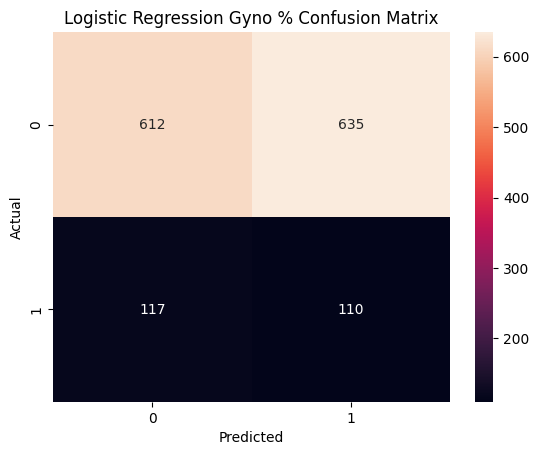

In [52]:
# Make predictions on the test set using the fitted pipeline
y_pred_log_gyno = tuned_gyno_pipeline.predict(X_test_singleG)

print('----------- Test --------------')
print("Accuracy:", accuracy_score(y_test, y_pred_log_gyno))
print("\nClassification Report:\n", classification_report(y_test, y_pred_log_gyno))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_log_gyno))

cm=confusion_matrix(y_test, y_pred_log_gyno)

# Visualizing confusion matrix
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Logistic Regression Gyno % Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()


Optimal threshold for percent gynoid fat (using Youden's Index): 0.4751324748111202


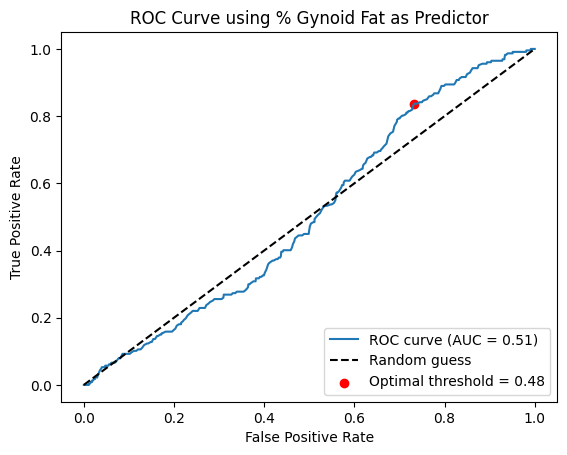

In [53]:
y_proba_log_gyno= tuned_gyno_pipeline.predict_proba(X_test_singleG)[:, 1]

# Compute the ROC curve using the raw percent android fat as the predictor
fpr, tpr, thresholds = roc_curve(y_test, y_proba_log_gyno)
roc_auc = auc(fpr, tpr)

# Compute Youden's index: sensitivity + specificity - 1, where specificity = 1 - FPR.
youden_index = tpr - fpr

# Find the index of the maximum Youden's index
optimal_idx = np.argmax(youden_index)
optimal_threshold = thresholds[optimal_idx]

print("Optimal threshold for percent gynoid fat (using Youden's Index):", optimal_threshold)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random guess')
plt.scatter(fpr[optimal_idx], tpr[optimal_idx], marker='o', color='red',
            label=f'Optimal threshold = {optimal_threshold:.2f}')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve using % Gynoid Fat as Predictor')
plt.legend(loc='lower right')
plt.show()

## Train Andriod Model

In [ ]:
# Training Andriod
log_uni = LogisticRegression(penalty='l2', C=1.0, solver='liblinear')

# Perform cross-validation
cross= StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
scores = cross_val_score(log_uni, X_train_singleA, y_train, cv=cross, scoring='roc_auc')
print(scores)

#Confusion Matrix
con_score = cross_val_predict(log_uni, X_train_singleA, y_train, cv=cross)
confusion = confusion_matrix(y_train, con_score)
print("Confusion Matrix:\n", confusion)

[0.61347971 0.57918034 0.60160981 0.63054999 0.54466711 0.5573703
 0.57680917 0.52185666 0.62882298 0.54550068]
Confusion Matrix:
 [[4987    0]
 [ 906    0]]


## Tune Andriod Model

In [ ]:
#TUNING Andriod
f2_scorer = make_scorer(fbeta_score, beta=2, pos_label=1)

hypaA_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('sampler', SMOTE()),
    ('logistic', LogisticRegression(solver='liblinear', random_state=42))
])

param_grid = {
    'sampler': [SMOTE(), RandomUnderSampler(), RandomOverSampler(), SMOTETomek(), BorderlineSMOTE(kind='borderline-1')],
    'logistic__C': [0.01, 0.1, 1, 100, 150, 200, 250, 300],
    'logistic__penalty': ['l1', 'l2'],
    'logistic__class_weight': [None, 'balanced'],
    'logistic__max_iter':[1000]
}

grid= GridSearchCV(hypaA_pipeline, param_grid, cv=cross, scoring=f2_scorer, n_jobs=-1)
best_grid=grid.fit(X_train_singleA, y_train)
print("Best hyperparameters:", grid.best_params_)

Best hyperparameters: {'logistic__C': 0.01, 'logistic__class_weight': None, 'logistic__max_iter': 1000, 'logistic__penalty': 'l1', 'sampler': SMOTE()}


## Train Tuned Andriod Model

In [54]:
#TUNED Training andriod
tuned_and_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('sampler', SMOTE()),
    ('logistic', LogisticRegression(solver='liblinear', random_state=42,
                                    penalty='l1', C=0.01, class_weight= None, max_iter= 1000))
])

tuned_and_pipeline.fit(X_train_singleA, y_train)

# Perform cross-validation
cross= StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
scores = cross_val_score(tuned_and_pipeline, X_train_singleA, y_train, cv=cross, scoring='roc_auc')
print(scores)

#Confusion Matrix
con_score = cross_val_predict(tuned_and_pipeline, X_train_singleA, y_train, cv=cross)
confusion = confusion_matrix(y_train, con_score)
print("Confusion Matrix:\n", confusion)

[0.61347971 0.57918034 0.60160981 0.63054999 0.54466711 0.5573703
 0.57680917 0.52185666 0.62882298 0.54550068]
Confusion Matrix:
 [[2387 2600]
 [ 320  586]]


## Test Tuned Andriod Model

----------- Test --------------
Accuracy: 0.49118046132971505

Classification Report:
               precision    recall  f1-score   support

         0.0       0.87      0.47      0.61      1247
         1.0       0.17      0.60      0.27       227

    accuracy                           0.49      1474
   macro avg       0.52      0.54      0.44      1474
weighted avg       0.76      0.49      0.56      1474


Confusion Matrix:
 [[588 659]
 [ 91 136]]


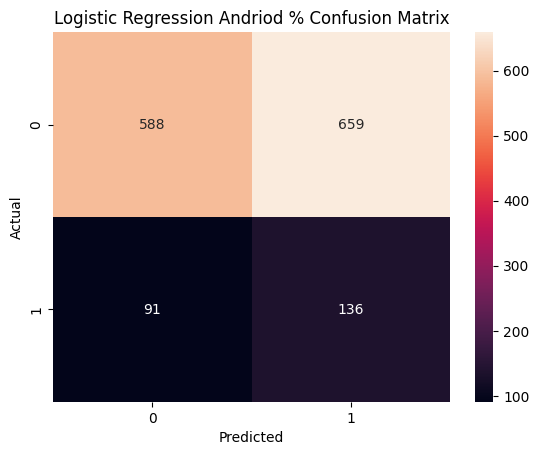

In [55]:
# Make predictions on the test set using the fitted pipeline
y_pred_log_and = tuned_and_pipeline.predict(X_test_singleA)

print('----------- Test --------------')
print("Accuracy:", accuracy_score(y_test, y_pred_log_and))
print("\nClassification Report:\n", classification_report(y_test, y_pred_log_and))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_log_and))

cm=confusion_matrix(y_test, y_pred_log_and)

# Visualizing confusion matrix
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Logistic Regression Andriod % Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()


Optimal threshold for percent Andriod fat (using Youden's Index): 0.5227090474769286


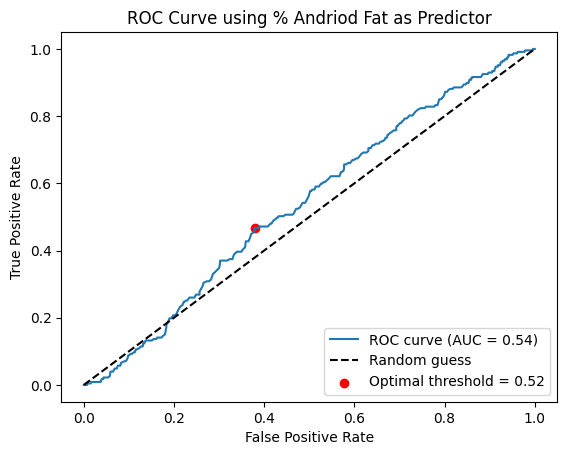

In [56]:
y_proba_log_and= tuned_and_pipeline.predict_proba(X_test_singleA)[:, 1]

# Compute the ROC curve using the raw percent android fat as the predictor
fpr, tpr, thresholds = roc_curve(y_test, y_proba_log_and)
roc_auc = auc(fpr, tpr)

# Compute Youden's index: sensitivity + specificity - 1, where specificity = 1 - FPR.
youden_index = tpr - fpr

# Find the index of the maximum Youden's index
optimal_idx = np.argmax(youden_index)
optimal_threshold = thresholds[optimal_idx]

print("Optimal threshold for percent Andriod fat (using Youden's Index):", optimal_threshold)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random guess')
plt.scatter(fpr[optimal_idx], tpr[optimal_idx], marker='o', color='red',
            label=f'Optimal threshold = {optimal_threshold:.2f}')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve using % Andriod Fat as Predictor')
plt.legend(loc='lower right')
plt.show()

#***Decision Tree***

## Train Gyno Model

In [ ]:
DT_gyno = Pipeline([
    ('scaler', StandardScaler()),
    ('DT', DecisionTreeClassifier(criterion='entropy', class_weight='balanced'))
])


DT_gyno.fit(X_train_singleG, y_train)

# Perform cross-validation
cross= StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
scores = cross_val_score(DT_gyno, X_train_singleG, y_train, cv=cross, scoring='roc_auc')
print(scores)

#confusion matrix
con_score = cross_val_predict(DT_gyno, X_train_singleG, y_train, cv=cross)
confusion = confusion_matrix(y_train, con_score)
print("Confusion Matrix:\n", confusion)

[0.4888238  0.52683389 0.50146447 0.49771766 0.52108662 0.51666667
 0.53861055 0.52187872 0.51886668 0.4961384 ]
Confusion Matrix:
 [[2594 2393]
 [ 481  425]]


## Tune Gyno Model

In [ ]:
f2_scorer = make_scorer(fbeta_score, beta=2, pos_label=1)

DTG_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('sampler', SMOTE()),
    ('DT', DecisionTreeClassifier(random_state=42))
])

# Define hyperparameter grid for the Decision Tree
param_grid = {
    'sampler': [SMOTE(), RandomUnderSampler(), RandomOverSampler(), SMOTETomek(), BorderlineSMOTE(kind='borderline-1')],
    'DT__criterion': ['gini', 'entropy'],
    'DT__class_weight': [None, 'balanced'],
    'DT__max_depth': [None, 3, 5, 10],
    'DT__min_samples_split': [2, 5, 10],
    'DT__min_samples_leaf': [1, 2, 5]
}

# Set up cross-validation strategy
cross = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Set up GridSearchCV with the pipeline and parameter grid
grid = GridSearchCV(DTG_pipeline, param_grid, cv=cross, scoring=f2_scorer, n_jobs=-1)
grid.fit(X_train_singleG, y_train)

# Output best hyperparameters
print("Best Hyperparameters:", grid.best_params_)

Best Hyperparameters: {'DT__class_weight': 'balanced', 'DT__criterion': 'entropy', 'DT__max_depth': 3, 'DT__min_samples_leaf': 1, 'DT__min_samples_split': 5, 'sampler': SMOTE()}


## Train Tuned Gyno Model

In [45]:
Tuned_DT_gyno = Pipeline([
    ('scaler', StandardScaler()),
    ('sampler', SMOTE()),
    ('DT', DecisionTreeClassifier( class_weight= 'balanced', criterion='entropy', max_depth= 3,
                                  min_samples_leaf=1, min_samples_split=5))
])


Tuned_DT_gyno.fit(X_train_singleG, y_train)

# Perform cross-validation
cross= StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
scores = cross_val_score(Tuned_DT_gyno, X_train_singleG, y_train, cv=cross, scoring='roc_auc')
print(scores)

#confusion matrix
con_score = cross_val_predict(Tuned_DT_gyno, X_train_singleG, y_train, cv=cross)
confusion = confusion_matrix(y_train, con_score)
print("Confusion Matrix:\n", confusion)

[0.58674492 0.55633245 0.53647955 0.53515921 0.52582944 0.56308172
 0.5668448  0.52612648 0.51072422 0.57266428]
Confusion Matrix:
 [[1931 3056]
 [ 275  631]]


## Test Tuned Gyno Model

----------- Test --------------
Accuracy: 0.3202170963364993

Classification Report:
               precision    recall  f1-score   support

         0.0       0.90      0.22      0.35      1247
         1.0       0.17      0.87      0.28       227

    accuracy                           0.32      1474
   macro avg       0.54      0.54      0.32      1474
weighted avg       0.79      0.32      0.34      1474


Confusion Matrix:
 [[275 972]
 [ 30 197]]


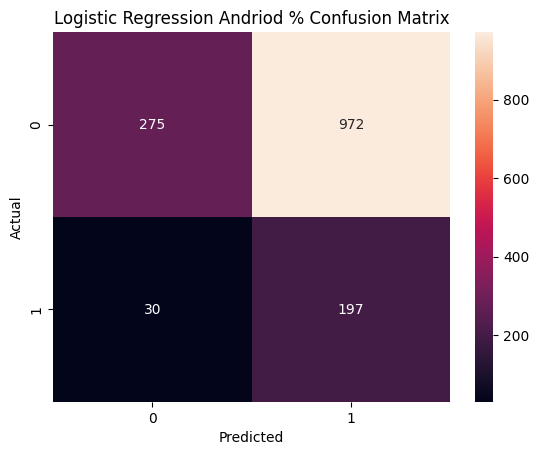

In [46]:
# Make predictions on the test set using the fitted pipeline
y_pred_dt_gyno = Tuned_DT_gyno.predict(X_test_singleG)

print('----------- Test --------------')
print("Accuracy:", accuracy_score(y_test, y_pred_dt_gyno))
print("\nClassification Report:\n", classification_report(y_test, y_pred_dt_gyno))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_dt_gyno))

cm=confusion_matrix(y_test, y_pred_dt_gyno)

# Visualizing confusion matrix
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Logistic Regression Andriod % Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

Optimal threshold for percent Andriod fat (using Youden's Index): 0.5258663366336633


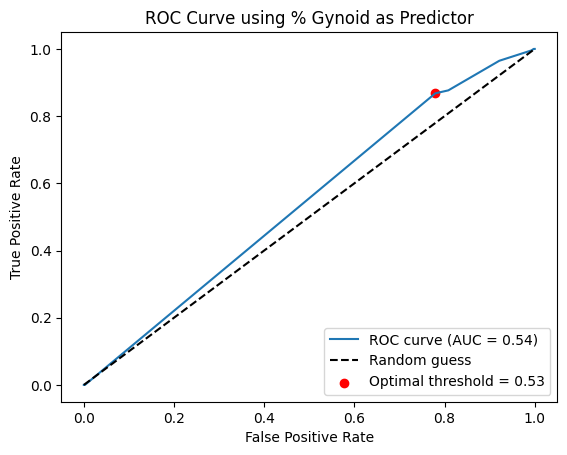

In [47]:
y_proba_dt_gyno= Tuned_DT_gyno.predict_proba(X_test_singleG)[:, 1]

# Compute the ROC curve using the raw percent android fat as the predictor
fpr, tpr, thresholds = roc_curve(y_test, y_proba_dt_gyno)
roc_auc = auc(fpr, tpr)

# Compute Youden's index: sensitivity + specificity - 1, where specificity = 1 - FPR.
youden_index = tpr - fpr

# Find the index of the maximum Youden's index
optimal_idx = np.argmax(youden_index)
optimal_threshold = thresholds[optimal_idx]

print("Optimal threshold for percent Andriod fat (using Youden's Index):", optimal_threshold)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random guess')
plt.scatter(fpr[optimal_idx], tpr[optimal_idx], marker='o', color='red',
            label=f'Optimal threshold = {optimal_threshold:.2f}')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve using % Gynoid as Predictor')
plt.legend(loc='lower right')
plt.show()

## Train Andriod Model

In [ ]:
DT_and = Pipeline([
    ('scaler', StandardScaler()),
    ('DT', DecisionTreeClassifier(criterion='entropy', class_weight='balanced'))
])


DT_and.fit(X_train_singleA, y_train)

# Perform cross-validation
cross= StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
scores = cross_val_score(DT_gyno, X_train_singleA, y_train, cv=cross, scoring='roc_auc')
print(scores)

#confusion matrix
con_score = cross_val_predict(DT_and, X_train_singleA, y_train, cv=cross)
confusion = confusion_matrix(y_train, con_score)
print("Confusion Matrix:\n", confusion)

[0.53959567 0.55626638 0.52670176 0.56363839 0.5499666  0.54575818
 0.54088176 0.52859791 0.58585992 0.53806435]
Confusion Matrix:
 [[2681 2306]
 [ 430  476]]


## Tune Andriod Model

In [ ]:
f2_scorer = make_scorer(fbeta_score, beta=2, pos_label=1)

DTA_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('sampler', SMOTE()),
    ('DT', DecisionTreeClassifier(random_state=42))
])

# Define hyperparameter grid for the Decision Tree
param_grid = {
    'sampler': [SMOTE(), RandomUnderSampler(), RandomOverSampler(), SMOTETomek(), BorderlineSMOTE(kind='borderline-1')],
    'DT__criterion': ['gini', 'entropy'],
    'DT__class_weight': [None, 'balanced'],
    'DT__max_depth': [None, 3, 5, 10],
    'DT__min_samples_split': [2, 5, 10],
    'DT__min_samples_leaf': [1, 2, 5]
}

# Set up cross-validation strategy
cross = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Set up GridSearchCV with the pipeline and parameter grid
grid = GridSearchCV(DTA_pipeline, param_grid, cv=cross, scoring=f2_scorer, n_jobs=-1)
grid.fit(X_train_singleA, y_train)

# Output best hyperparameters
print("Best Hyperparameters:", grid.best_params_)

Best Hyperparameters: {'DT__class_weight': None, 'DT__criterion': 'entropy', 'DT__max_depth': 5, 'DT__min_samples_leaf': 1, 'DT__min_samples_split': 5, 'sampler': RandomUnderSampler()}


## Train Tuned Andriod Model

In [48]:
Tuned_DT_and = Pipeline([
    ('scaler', StandardScaler()),
    ('sampler', RandomOverSampler()),
    ('DT', DecisionTreeClassifier( class_weight= None, criterion='entropy', max_depth= 5,
                                  min_samples_leaf=1, min_samples_split=5))
])


Tuned_DT_and.fit(X_train_singleG, y_train)

# Perform cross-validation
cross= StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
scores = cross_val_score(Tuned_DT_and, X_train_singleA, y_train, cv=cross, scoring='roc_auc')
print(scores)

#confusion matrix
con_score = cross_val_predict(Tuned_DT_and, X_train_singleA, y_train, cv=cross)
confusion = confusion_matrix(y_train, con_score)
print("Confusion Matrix:\n", confusion)

[0.58217534 0.57567883 0.61238961 0.6258183  0.56478513 0.5669784
 0.5825206  0.52598305 0.62942981 0.56106845]
Confusion Matrix:
 [[2732 2255]
 [ 381  525]]


## Test Tuned Andriod Model

----------- Test --------------
Accuracy: 0.4335142469470828

Classification Report:
               precision    recall  f1-score   support

         0.0       0.90      0.37      0.53      1247
         1.0       0.18      0.76      0.29       227

    accuracy                           0.43      1474
   macro avg       0.54      0.57      0.41      1474
weighted avg       0.79      0.43      0.49      1474


Confusion Matrix:
 [[466 781]
 [ 54 173]]


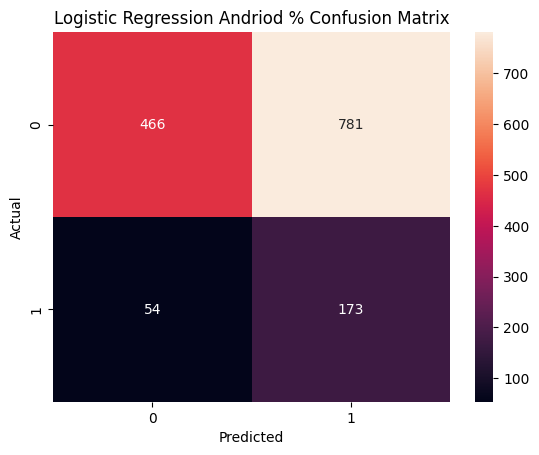

In [49]:
# Make predictions on the test set using the fitted pipeline
y_pred_dt_and = Tuned_DT_and.predict(X_test_singleG)

print('----------- Test --------------')
print("Accuracy:", accuracy_score(y_test, y_pred_dt_and))
print("\nClassification Report:\n", classification_report(y_test, y_pred_dt_and))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_dt_and))

cm=confusion_matrix(y_test, y_pred_dt_and)

# Visualizing confusion matrix
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Logistic Regression Andriod % Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

Optimal threshold for percent Andriod fat (using Youden's Index): 0.5141884222474461


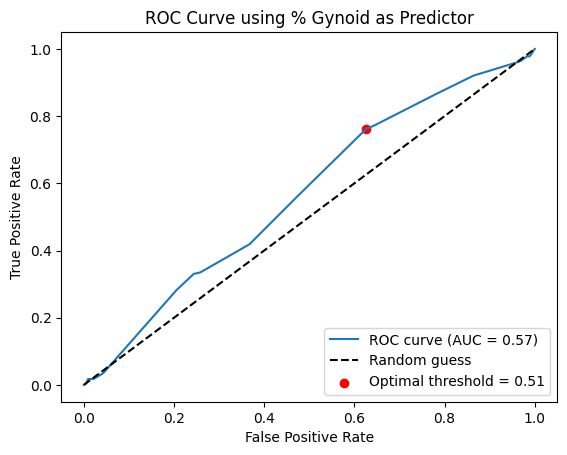

In [50]:
y_proba_dt_and= Tuned_DT_and.predict_proba(X_test_singleG)[:, 1]

# Compute the ROC curve using the raw percent android fat as the predictor
fpr, tpr, thresholds = roc_curve(y_test, y_proba_dt_and)
roc_auc = auc(fpr, tpr)

# Compute Youden's index: sensitivity + specificity - 1, where specificity = 1 - FPR.
youden_index = tpr - fpr

# Find the index of the maximum Youden's index
optimal_idx = np.argmax(youden_index)
optimal_threshold = thresholds[optimal_idx]

print("Optimal threshold for percent Andriod fat (using Youden's Index):", optimal_threshold)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random guess')
plt.scatter(fpr[optimal_idx], tpr[optimal_idx], marker='o', color='red',
            label=f'Optimal threshold = {optimal_threshold:.2f}')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve using % Gynoid as Predictor')
plt.legend(loc='lower right')
plt.show()

#***Random Forest***

## Train Gynoid Model

In [ ]:
rf_pipeline_gyno = Pipeline([
    ('scaler', StandardScaler()),
    ('sampler', SMOTE()),
    ('random_forest', RandomForestClassifier(random_state=42))
])

# Train the univariate model on the training data (only using DXXAPFAT)
rf_pipeline_gyno.fit(X_train_singleG, y_train)

# Perform cross-validation
cross= StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
scores = cross_val_score(rf_pipeline_gyno, X_train_singleG, y_train, cv=cross, scoring='roc_auc')
print(scores)

#Confusion Matrix
con_score = cross_val_predict(rf_pipeline_gyno, X_train_singleG, y_train, cv=cross)
confusion = confusion_matrix(y_train, con_score)
print("Confusion Matrix:\n", confusion)

[0.47777974 0.51240943 0.50774076 0.50381875 0.52816745 0.53891116
 0.53520374 0.52045545 0.51769716 0.54150669]
Confusion Matrix:
 [[3965 1022]
 [ 705  201]]


## Tune Gynoid Model

In [ ]:
#TUNE
f2_scorer = make_scorer(fbeta_score, beta=2, pos_label=1)

rfg_tuning = Pipeline([
    ('scaler', StandardScaler()),
    ('sampler', SMOTE()),
    ('random_forest', RandomForestClassifier(random_state=42))
])

param_grid = {
    'sampler': [SMOTE(), RandomUnderSampler(), RandomOverSampler(), SMOTETomek(), BorderlineSMOTE(kind='borderline-1')],
    'random_forest__n_estimators' : [100, 200, 300],
    'random_forest__max_depth' : [5, 10, 15],
    'random_forest__min_samples_leaf' : [15, 20 ,25],
    'random_forest__max_features' : ['sqrt','auto','log2']
}

grid= GridSearchCV(rfg_tuning, param_grid, cv=cross, scoring=f2_scorer, n_jobs=-1)
best_grid=grid.fit(X_train_singleG, y_train)
print("Best hyperparameters:", grid.best_params_)

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
1350 fits failed out of a total of 4050.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
724 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/imblearn/pipeline.py", line 526, in fit
    self._final_estimator.fit(Xt, y

Best hyperparameters: {'random_forest__max_depth': 5, 'random_forest__max_features': 'sqrt', 'random_forest__min_samples_leaf': 20, 'random_forest__n_estimators': 100, 'sampler': RandomOverSampler()}


## Train Tuned Gynoid Model

In [40]:
tuned_rfg_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('sampler', RandomOverSampler()),
    ('random_forest', RandomForestClassifier(random_state=42,
      max_depth=5, max_features='sqrt', min_samples_leaf=20,
      n_estimators=100))
])

# Train the univariate model on the training data (only using DXXAPFAT)
tuned_rfg_pipeline.fit(X_train_singleG, y_train)

# Perform cross-validation
cross= StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
scores = cross_val_score(tuned_rfg_pipeline, X_train_singleG, y_train, cv=cross, scoring='roc_auc')
print(scores)

#Confusion Matrix
con_score = cross_val_predict(tuned_rfg_pipeline, X_train_singleG, y_train, cv=cross)
confusion = confusion_matrix(y_train, con_score)
print("Confusion Matrix:\n", confusion)

[0.59178797 0.57429144 0.56441454 0.57860165 0.56167891 0.55257181
 0.57887998 0.55516572 0.538947   0.5791959 ]
Confusion Matrix:
 [[2373 2614]
 [ 334  572]]


## Test Tuned Gynoid Model

----------- Test --------------
Accuracy: 0.4864314789687924

Classification Report:
               precision    recall  f1-score   support

         0.0       0.89      0.45      0.60      1247
         1.0       0.18      0.68      0.29       227

    accuracy                           0.49      1474
   macro avg       0.53      0.56      0.44      1474
weighted avg       0.78      0.49      0.55      1474


Confusion Matrix:
 [[563 684]
 [ 73 154]]


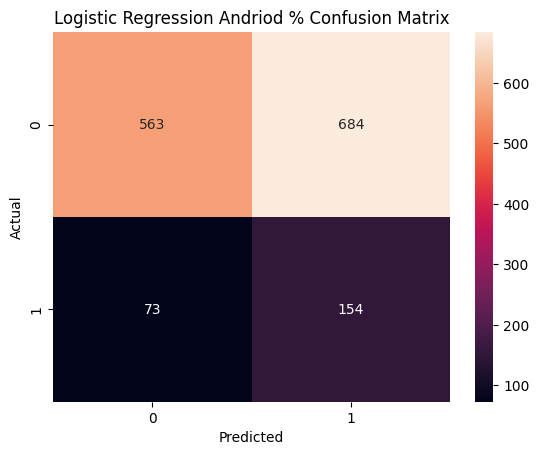

In [41]:
# Make predictions on the test set using the fitted pipeline
y_pred_rf_gyno = tuned_rfg_pipeline.predict(X_test_singleG)

print('----------- Test --------------')
print("Accuracy:", accuracy_score(y_test, y_pred_rf_gyno))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf_gyno))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_rf_gyno))

cm=confusion_matrix(y_test, y_pred_rf_gyno)

# Visualizing confusion matrix
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Logistic Regression Andriod % Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

Optimal threshold for percent Andriod fat (using Youden's Index): 0.5049086439769684


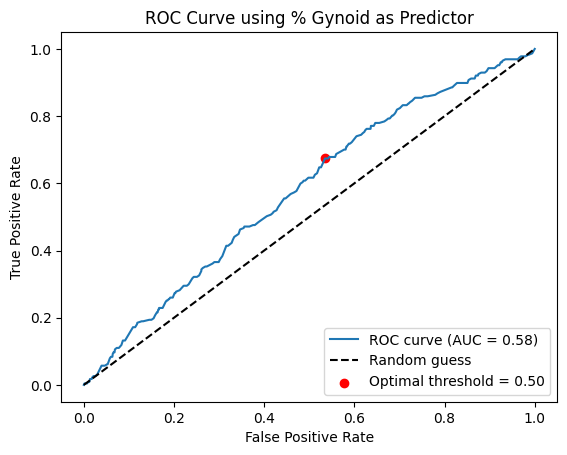

In [42]:
y_proba_rf_gyno= tuned_rfg_pipeline.predict_proba(X_test_singleG)[:, 1]

# Compute the ROC curve using the raw percent android fat as the predictor
fpr, tpr, thresholds = roc_curve(y_test, y_proba_rf_gyno)
roc_auc = auc(fpr, tpr)

# Compute Youden's index: sensitivity + specificity - 1, where specificity = 1 - FPR.
youden_index = tpr - fpr

# Find the index of the maximum Youden's index
optimal_idx = np.argmax(youden_index)
optimal_threshold = thresholds[optimal_idx]

print("Optimal threshold for percent Andriod fat (using Youden's Index):", optimal_threshold)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random guess')
plt.scatter(fpr[optimal_idx], tpr[optimal_idx], marker='o', color='red',
            label=f'Optimal threshold = {optimal_threshold:.2f}')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve using % Gynoid as Predictor')
plt.legend(loc='lower right')
plt.show()

## Train Andriod Model

In [ ]:
rf_pipeline_and = Pipeline([
    ('scaler', StandardScaler()),
    ('sampler', SMOTE()),
    ('random_forest', RandomForestClassifier(random_state=42))
])

# Train the univariate model on the training data (only using DXXAPFAT)
rf_pipeline_and.fit(X_train_singleA, y_train)

# Perform cross-validation
cross= StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
scores = cross_val_score(rf_pipeline_and, X_train_singleA, y_train, cv=cross, scoring='roc_auc')
print(scores)

#Confusion Matrix
con_score = cross_val_predict(rf_pipeline_and, X_train_singleA, y_train, cv=cross)
confusion = confusion_matrix(y_train, con_score)
print("Confusion Matrix:\n", confusion)

[0.54156665 0.54006915 0.5417208  0.56086618 0.55755956 0.56197951
 0.56094411 0.51062492 0.5986032  0.54571031]
Confusion Matrix:
 [[3840 1147]
 [ 660  246]]


## Tune Andriod Model

In [ ]:
#TUNE
f2_scorer = make_scorer(fbeta_score, beta=2, pos_label=1)

rfa_tuning = Pipeline([
    ('scaler', StandardScaler()),
    ('sampler', SMOTE()),
    ('random_forest', RandomForestClassifier(random_state=42))
])

param_grid = {
    'sampler': [SMOTE(), RandomUnderSampler(), RandomOverSampler(), SMOTETomek(), BorderlineSMOTE(kind='borderline-1')],
    'random_forest__n_estimators' : [100, 200, 300],
    'random_forest__max_depth' : [5, 10, 15],
    'random_forest__min_samples_leaf' : [15, 20 ,25],
    'random_forest__max_features' : ['sqrt','auto','log2']
}

grid= GridSearchCV(rfa_tuning, param_grid, cv=cross, scoring=f2_scorer, n_jobs=-1)
best_grid=grid.fit(X_train_singleA, y_train)
print("Best hyperparameters:", grid.best_params_)

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
1350 fits failed out of a total of 4050.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
741 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/imblearn/pipeline.py", line 526, in fit
    self._final_estimator.fit(Xt, y

Best hyperparameters: {'random_forest__max_depth': 5, 'random_forest__max_features': 'sqrt', 'random_forest__min_samples_leaf': 15, 'random_forest__n_estimators': 200, 'sampler': RandomOverSampler()}


## Train Tuned Andriod Model

In [61]:
tuned_rfa_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('sampler', RandomOverSampler()),
    ('random_forest', RandomForestClassifier(random_state=42,
      max_depth=5, max_features='sqrt', min_samples_leaf=20,
      n_estimators=100))
])

# Train the univariate model on the training data (only using DXXAPFAT)
tuned_rfa_pipeline.fit(X_train_singleA, y_train)

# Perform cross-validation
cross= StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
scores = cross_val_score(tuned_rfa_pipeline, X_train_singleA, y_train, cv=cross, scoring='roc_auc')
print(scores)

#Confusion Matrix
con_score = cross_val_predict(tuned_rfa_pipeline, X_train_singleA, y_train, cv=cross)
confusion = confusion_matrix(y_train, con_score)
print("Confusion Matrix:\n", confusion)

[0.58830849 0.58588606 0.59654474 0.61239145 0.58097306 0.55322868
 0.57380316 0.548601   0.64638775 0.55321285]
Confusion Matrix:
 [[2676 2311]
 [ 377  529]]


## Test Tuned Andriod Model

----------- Test --------------
Accuracy: 0.47218453188602444

Classification Report:
               precision    recall  f1-score   support

         0.0       0.86      0.45      0.59      1247
         1.0       0.16      0.59      0.26       227

    accuracy                           0.47      1474
   macro avg       0.51      0.52      0.42      1474
weighted avg       0.75      0.47      0.54      1474


Confusion Matrix:
 [[561 686]
 [ 92 135]]


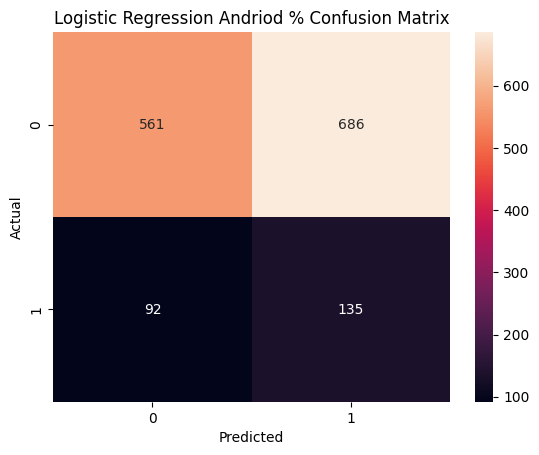

In [62]:
# Make predictions on the test set using the fitted pipeline
y_pred_rf_and = tuned_rfa_pipeline.predict(X_test_singleA)

print('----------- Test --------------')
print("Accuracy:", accuracy_score(y_test, y_pred_rf_and))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf_and))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_rf_and))

cm=confusion_matrix(y_test, y_pred_rf_and)

# Visualizing confusion matrix
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Logistic Regression Andriod % Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

Optimal threshold for percent Andriod fat (using Youden's Index): 0.5049086439769684


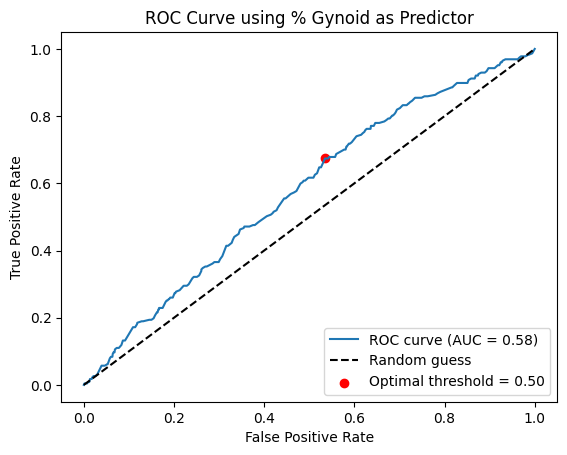

In [63]:
y_proba_rf_and= tuned_rfa_pipeline.predict_proba(X_test_singleA)[:, 1]

# Compute the ROC curve using the raw percent android fat as the predictor
fpr, tpr, thresholds = roc_curve(y_test, y_proba_rf_gyno)
roc_auc = auc(fpr, tpr)

# Compute Youden's index: sensitivity + specificity - 1, where specificity = 1 - FPR.
youden_index = tpr - fpr

# Find the index of the maximum Youden's index
optimal_idx = np.argmax(youden_index)
optimal_threshold = thresholds[optimal_idx]

print("Optimal threshold for percent Andriod fat (using Youden's Index):", optimal_threshold)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random guess')
plt.scatter(fpr[optimal_idx], tpr[optimal_idx], marker='o', color='red',
            label=f'Optimal threshold = {optimal_threshold:.2f}')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve using % Gynoid as Predictor')
plt.legend(loc='lower right')
plt.show()

#***XGBOOST***

## Train Gyno/And

In [23]:
xgb_pipeline_gyno = Pipeline([
    ('scaler', StandardScaler()),
    ('sampler', SMOTE()),
    ('xgboost', XGBClassifier(random_state=42))
])

xgb_pipeline_and = Pipeline([
    ('scaler', StandardScaler()),
    ('sampler', SMOTE()),
    ('xgboost', XGBClassifier(random_state=42))
])

xgb_pipeline_gyno.fit(X_train_singleG, y_train)

xgb_pipeline_and.fit(X_train_singleA, y_train)

#Cross Validation
cross= StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
scores = cross_val_score(xgb_pipeline_gyno, X_train_singleG, y_train, cv=cross, scoring='roc_auc')
scoresA = cross_val_score(xgb_pipeline_and, X_train_singleA, y_train, cv=cross, scoring='roc_auc')
print(scores)
print(scoresA)

#Confusion Martix
con_score = cross_val_predict(xgb_pipeline_gyno, X_train_singleG, y_train, cv=cross)
con_scoreA = cross_val_predict(xgb_pipeline_and, X_train_singleA, y_train, cv=cross)
confusion = confusion_matrix(y_train, con_score)
confusionA = confusion_matrix(y_train, con_scoreA)
print("Confusion Matrix gyno:\n", confusion)
print("Confusion Matrix and:\n", confusionA)


[0.56332445 0.56940254 0.51468872 0.54686039 0.51029837 0.5585727
 0.59531285 0.54995807 0.55345558 0.53672933]
[0.54163272 0.56100112 0.55094805 0.56613226 0.50765976 0.52820085
 0.51035404 0.47674213 0.588883   0.52832208]
Confusion Matrix gyno:
 [[2961 2026]
 [ 500  406]]
Confusion Matrix and:
 [[2989 1998]
 [ 494  412]]


In [25]:
f2_xbg_train_gyno=cross_val_score(xgb_pipeline_gyno, X_train_singleG, y_train, cv=cross, scoring=f2_scorer)
print(f2_xbg_train_gyno)

[0.38461538 0.35541195 0.31355932 0.3802589  0.32173913 0.33043478
 0.34863946 0.34982935 0.32958199 0.30130293]


In [ ]:
#TUNING
f2_scorer = make_scorer(fbeta_score, beta=2, pos_label=1)

xgb_tuning_gyno = Pipeline([
    ('scaler', StandardScaler()),
    ('sampler', SMOTE()),
    ('xgboost', XGBClassifier(random_state=42))
])

xbg_tuning_and = Pipeline([
    ('scaler', StandardScaler()),
    ('sampler', SMOTE()),
    ('xgboost', XGBClassifier(random_state=42))
])

param_grid = {
    'sampler': [SMOTE(), RandomUnderSampler(), RandomOverSampler(), SMOTETomek(), BorderlineSMOTE(kind='borderline-1')],
    "xgboost__n_estimators" : [100, 200, 500],
    "xgboost__max_depth" : [1, 3, 5, 7],
    "xgboost__learning_rate" : [.01, .05, .1,  .2],
    "xgboost__min_child_weight" : [1, 3, 5, 7]
}

grid_g= GridSearchCV(xgb_tuning_gyno, param_grid, cv=cross, scoring=f2_scorer, n_jobs=-1)
best_grid_g=grid_g.fit(X_train_singleG, y_train)
print("Best hyperparameters Gyno:", grid_g.best_params_)

grid_a= GridSearchCV(xbg_tuning_and, param_grid, cv=cross, scoring=f2_scorer, n_jobs=-1)
best_grid_a=grid_a.fit(X_train_singleA, y_train)
print("Best hyperparameters And:", grid_a.best_params_)

Best hyperparameters Gyno: {'sampler': SMOTE(), 'xgboost__learning_rate': 0.01, 'xgboost__max_depth': 1, 'xgboost__min_child_weight': 3, 'xgboost__n_estimators': 100}
Best hyperparameters And: {'sampler': RandomUnderSampler(), 'xgboost__learning_rate': 0.01, 'xgboost__max_depth': 3, 'xgboost__min_child_weight': 5, 'xgboost__n_estimators': 100}


## TRAIN TUNED XGB

In [30]:
#APPLY PARAMETER
tuned_xgb_gyno = Pipeline([
    ('scaler', StandardScaler()),
    ('sampler', SMOTE()),
    ('xgboost', XGBClassifier(random_state=42, learning_rate=0.01, max_depth=1,
                               min_child_weight=3, n_estimators=100))
])

tuned_xgb_and = Pipeline([
    ('scaler', StandardScaler()),
    ('sampler', RandomUnderSampler()),
    ('xgboost', XGBClassifier(random_state=42, learning_rate=0.01, max_depth=3,
                               min_child_weight=5, n_estimators=500))
])

tuned_xgb_gyno.fit(X_train_singleG, y_train)

tuned_xgb_and.fit(X_train_singleA, y_train)

cross= StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
scores = cross_val_score(tuned_xgb_gyno, X_train_singleG, y_train, cv=cross, scoring='roc_auc')
scoresA = cross_val_score(tuned_xgb_and, X_train_singleA, y_train, cv=cross, scoring='roc_auc')
print(scores)
print(scoresA)

con_score = cross_val_predict(tuned_xgb_gyno, X_train_singleG, y_train, cv=cross)
con_scoreA = cross_val_predict(tuned_xgb_and, X_train_singleA, y_train, cv=cross)
confusion = confusion_matrix(y_train, con_score)
confusionA = confusion_matrix(y_train, con_scoreA)
print("Confusion Matrix gyno:\n", confusion)
print("Confusion Matrix and:\n", confusionA)

[0.54616926 0.53740448 0.53671078 0.5678802  0.5345246  0.51861501
 0.56040971 0.54133016 0.54550068 0.5599541 ]
[0.57441256 0.58686604 0.59572992 0.58990203 0.56113338 0.57028501
 0.58757515 0.54202524 0.64279094 0.56647469]
Confusion Matrix gyno:
 [[1190 3797]
 [ 145  761]]
Confusion Matrix and:
 [[2567 2420]
 [ 348  558]]


## TEST XGB

----------- Test Gyno --------------
Accuracy: 0.31275440976933516

Classification Report:
               precision    recall  f1-score   support

         0.0       0.91      0.21      0.34      1247
         1.0       0.17      0.88      0.28       227

    accuracy                           0.31      1474
   macro avg       0.54      0.55      0.31      1474
weighted avg       0.79      0.31      0.33      1474


Confusion Matrix:
 [[261 986]
 [ 27 200]]
----------- Test And --------------
Accuracy: 0.5359565807327001

Classification Report:
               precision    recall  f1-score   support

         0.0       0.85      0.55      0.67      1247
         1.0       0.16      0.48      0.24       227

    accuracy                           0.54      1474
   macro avg       0.51      0.51      0.45      1474
weighted avg       0.75      0.54      0.60      1474


Confusion Matrix:
 [[680 567]
 [117 110]]


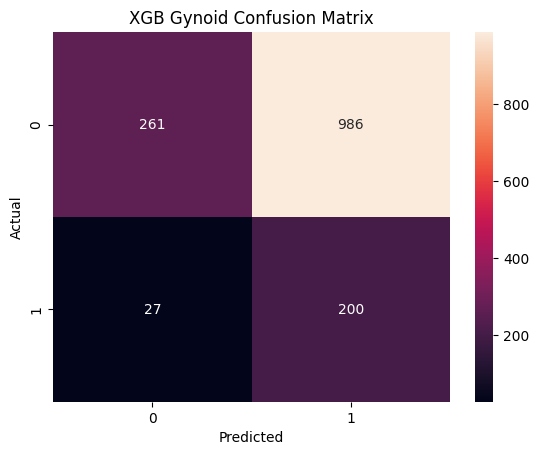

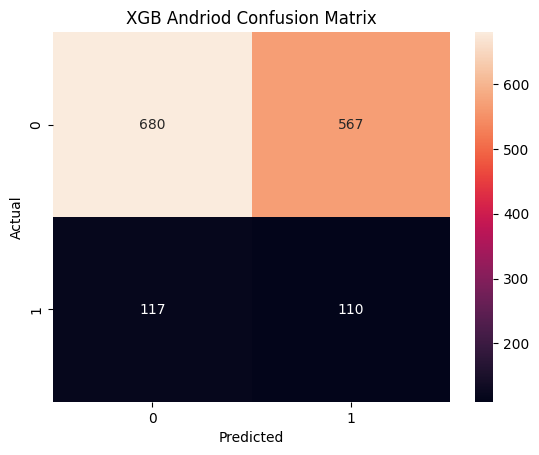

In [31]:
y_pred_xgb_gyno = tuned_xgb_gyno.predict(X_test_singleG)
y_pred_xgb_and = tuned_xgb_and.predict(X_test_singleA)

print('----------- Test Gyno --------------')
print("Accuracy:", accuracy_score(y_test, y_pred_xgb_gyno))
print("\nClassification Report:\n", classification_report(y_test, y_pred_xgb_gyno))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb_gyno))

print('----------- Test And --------------')
print("Accuracy:", accuracy_score(y_test, y_pred_xgb_and))
print("\nClassification Report:\n", classification_report(y_test, y_pred_xgb_and))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb_and))

cm_g=confusion_matrix(y_test, y_pred_xgb_gyno)
cm_a=confusion_matrix(y_test, y_pred_xgb_and)

sns.heatmap(cm_g, annot=True, fmt='d')
plt.title('XGB Gynoid Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

sns.heatmap(cm_a, annot=True, fmt='d')
plt.title('XGB Andriod Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

Optimal threshold for percent Gynoid fat (using Youden's Index): 0.51336217
Optimal threshold for percent Andriod fat (using Youden's Index): 0.43283513


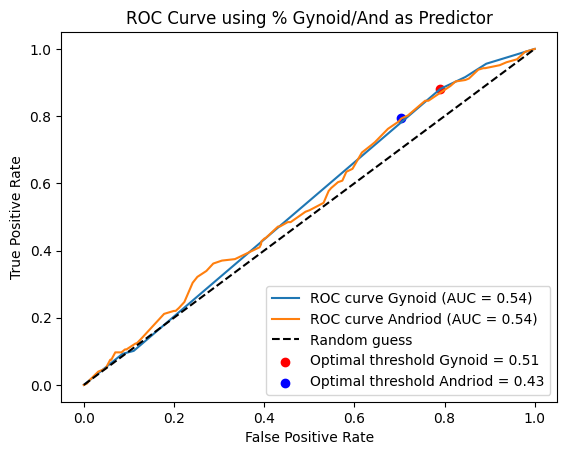

In [32]:
y_proba_xgb_gyno= tuned_xgb_gyno.predict_proba(X_test_singleG)[:, 1]
y_proba_xgb_and= tuned_xgb_and.predict_proba(X_test_singleA)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_proba_xgb_gyno)
roc_auc = auc(fpr, tpr)
fpr2, tpr2, thresholds2 = roc_curve(y_test, y_proba_xgb_and)
roc_auc2 = auc(fpr2, tpr2)

youden_index = tpr - fpr
youden_index2 = tpr2 - fpr2

optimal_idx = np.argmax(youden_index)
optimal_idx2 = np.argmax(youden_index2)

optimal_threshold = thresholds[optimal_idx]
optimal_threshold2 = thresholds2[optimal_idx2]

print("Optimal threshold for percent Gynoid fat (using Youden's Index):", optimal_threshold)
print("Optimal threshold for percent Andriod fat (using Youden's Index):", optimal_threshold2)

plt.figure()
plt.plot(fpr, tpr, label=f'ROC curve Gynoid (AUC = {roc_auc:.2f})')
plt.plot(fpr2, tpr2, label=f'ROC curve Andriod (AUC = {roc_auc2:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random guess')
plt.scatter(fpr[optimal_idx], tpr[optimal_idx], marker='o', color='red',
            label=f'Optimal threshold Gynoid = {optimal_threshold:.2f}')
plt.scatter(fpr2[optimal_idx2], tpr2[optimal_idx2], marker='o', color='blue',
            label=f'Optimal threshold Andriod = {optimal_threshold2:.2f}')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve using % Gynoid/And as Predictor')
plt.legend(loc='lower right')
plt.show()


#***ADABOOST***

## Train ADA

In [ ]:
ada_pipeline_gyno = Pipeline([
    ('scaler', StandardScaler()),
    ('sampler', SMOTE()),
    ('ada_boost', AdaBoostClassifier(random_state=42))
])

ada_pipeline_and = Pipeline([
    ('scaler', StandardScaler()),
    ('sampler', SMOTE()),
    ('ada_boost', AdaBoostClassifier(random_state=42))
])

ada_pipeline_gyno.fit(X_train_singleG, y_train)

ada_pipeline_and.fit(X_train_singleA, y_train)

cross= StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
scores = cross_val_score(ada_pipeline_gyno, X_train_singleG, y_train, cv=cross, scoring='roc_auc')
scoresA = cross_val_score(ada_pipeline_and, X_train_singleA, y_train, cv=cross, scoring='roc_auc')
print(scores)
print(scoresA)

con_score = cross_val_predict(ada_pipeline_gyno, X_train_singleG, y_train, cv=cross)
con_scoreA = cross_val_predict(ada_pipeline_and, X_train_singleA, y_train, cv=cross)
confusion= confusion_matrix(y_train, con_score)
confusionA = confusion_matrix(y_train, con_scoreA)
print("Confusion Matrix gyno:\n", confusion)
print("Confusion Matrix and:\n", confusionA)

[0.58873792 0.57272787 0.57633949 0.59077043 0.54839679 0.5424293
 0.57684257 0.52597202 0.54505936 0.57115274]
[0.58717435 0.56163976 0.58739457 0.60926297 0.56921621 0.56019817
 0.58812069 0.51511541 0.62290922 0.55257293]
Confusion Matrix gyno:
 [[2264 2723]
 [ 336  570]]
Confusion Matrix and:
 [[2745 2242]
 [ 379  527]]


## TUNE ADA

In [ ]:
f2_scorer = make_scorer(fbeta_score, beta=2, pos_label=1)

ada_tuning_gyno = Pipeline([
    ('scaler', StandardScaler()),
    ('sampler', SMOTE()),
    ('ada_boost', AdaBoostClassifier(random_state=42,
                                     estimator=DecisionTreeClassifier()))
])

ada_tuning_and = Pipeline([
    ('scaler', StandardScaler()),
    ('sampler', SMOTE()),
    ('ada_boost', AdaBoostClassifier(random_state=42,
                                     estimator=DecisionTreeClassifier()))
])

param_dist = {
    'sampler': [SMOTE(), RandomUnderSampler(), RandomOverSampler(), SMOTETomek(), BorderlineSMOTE(kind='borderline-1')],
    "ada_boost__n_estimators" : [100, 200, 500],
    "ada_boost__learning_rate" : [.01, .05, .1,  .2],
    "ada_boost__estimator__max_depth" : [1, 3, 5, 7],
    "ada_boost__estimator__min_samples_leaf" : [10, 25, 50],
    "ada_boost__estimator__criterion" : ["gini", "entropy"]
}

ran_g= RandomizedSearchCV(ada_tuning_gyno, param_dist, cv=cross, scoring=f2_scorer, n_iter=50, n_jobs=-1)
best_ran_g=ran_g.fit(X_train_singleG, y_train)
ran_a= RandomizedSearchCV(ada_tuning_and, param_dist, cv=cross, scoring=f2_scorer,n_iter=50, n_jobs=-1)
best_ran_a=ran_a.fit(X_train_singleA, y_train)
print("Best hyperparameters Gyno:", best_ran_g.best_params_)
print("Best hyperparameters And:", best_ran_a.best_params_)


Best hyperparameters Gyno: {'sampler': RandomOverSampler(), 'ada_boost__n_estimators': 100, 'ada_boost__learning_rate': 0.01, 'ada_boost__estimator__min_samples_leaf': 25, 'ada_boost__estimator__max_depth': 1, 'ada_boost__estimator__criterion': 'entropy'}
Best hyperparameters And: {'sampler': SMOTE(), 'ada_boost__n_estimators': 100, 'ada_boost__learning_rate': 0.01, 'ada_boost__estimator__min_samples_leaf': 50, 'ada_boost__estimator__max_depth': 1, 'ada_boost__estimator__criterion': 'entropy'}


## Train Tuned ADA

In [35]:
tuned_ada_gyno= Pipeline([
    ('scaler', StandardScaler()),
    ('sampler', RandomOverSampler()),
    ('ada_boost', AdaBoostClassifier(
        random_state=42,
        estimator=DecisionTreeClassifier(max_depth=1, min_samples_leaf=25, criterion='entropy'),
        n_estimators=100,
        learning_rate=0.01
    ))
])

tuned_ada_and= Pipeline([
    ('scaler', StandardScaler()),
    ('sampler', SMOTE()),
    ('ada_boost', AdaBoostClassifier(
        random_state=42,
        estimator=DecisionTreeClassifier(max_depth=1, min_samples_leaf=50, criterion='entropy'),
        n_estimators=100,
        learning_rate=0.01
    ))
])

tuned_ada_gyno.fit(X_train_singleG, y_train)

tuned_ada_and.fit(X_train_singleA, y_train)

cross= StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
scores = cross_val_score(tuned_ada_gyno, X_train_singleG, y_train, cv=cross, scoring='roc_auc')
scoresA= cross_val_score(tuned_ada_and, X_train_singleA, y_train, cv=cross, scoring='roc_auc')
print(scores)
print(scoresA)

con_score = cross_val_predict(tuned_ada_gyno, X_train_singleG, y_train, cv=cross)
con_scoreA = cross_val_predict(tuned_ada_and, X_train_singleA, y_train, cv=cross)
confusion = confusion_matrix(y_train, con_score)
confusionA = confusion_matrix(y_train, con_scoreA)
print("Confusion Matrix gyno:\n", confusion)
print("Confusion Matrix and:\n", confusionA)

[0.54697307 0.53580788 0.53799908 0.55676909 0.56059898 0.52766644
 0.54739479 0.52655678 0.52665607 0.55515468]
[0.59746966 0.5583805  0.58202119 0.60522155 0.54409931 0.56320419
 0.58185259 0.51190476 0.63131647 0.54329406]
Confusion Matrix gyno:
 [[ 954 4033]
 [ 109  797]]
Confusion Matrix and:
 [[2110 2877]
 [ 289  617]]


## Test ADA

----------- Test Gyno --------------
Accuracy: 0.31275440976933516

Classification Report:
               precision    recall  f1-score   support

         0.0       0.91      0.21      0.34      1247
         1.0       0.17      0.88      0.28       227

    accuracy                           0.31      1474
   macro avg       0.54      0.55      0.31      1474
weighted avg       0.79      0.31      0.33      1474


Confusion Matrix:
 [[261 986]
 [ 27 200]]
----------- Test And --------------
Accuracy: 0.3283582089552239

Classification Report:
               precision    recall  f1-score   support

         0.0       0.88      0.24      0.37      1247
         1.0       0.17      0.83      0.28       227

    accuracy                           0.33      1474
   macro avg       0.52      0.53      0.32      1474
weighted avg       0.77      0.33      0.36      1474


Confusion Matrix:
 [[296 951]
 [ 39 188]]


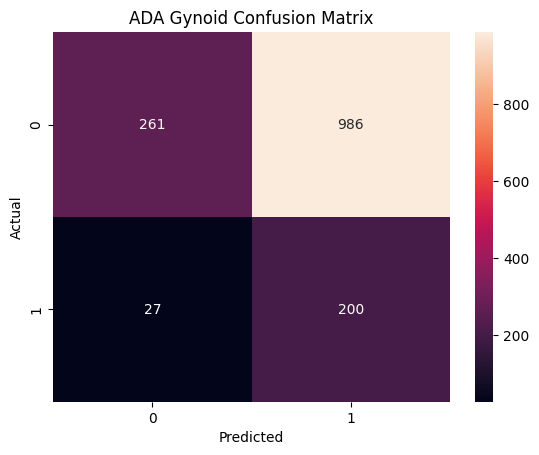

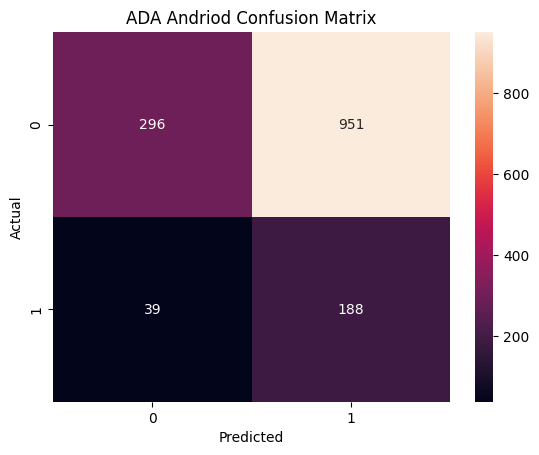

In [36]:
y_pred_ada_gyno = tuned_ada_gyno.predict(X_test_singleG)
y_pred_ada_and = tuned_ada_and.predict(X_test_singleA)

print('----------- Test Gyno --------------')
print("Accuracy:", accuracy_score(y_test, y_pred_ada_gyno))
print("\nClassification Report:\n", classification_report(y_test, y_pred_ada_gyno))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_ada_gyno))

print('----------- Test And --------------')
print("Accuracy:", accuracy_score(y_test, y_pred_ada_and))
print("\nClassification Report:\n", classification_report(y_test, y_pred_ada_and))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_ada_and))

cm_g=confusion_matrix(y_test, y_pred_ada_gyno)
cm_a=confusion_matrix(y_test, y_pred_ada_and)

sns.heatmap(cm_g, annot=True, fmt='d')
plt.title('ADA Gynoid Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

sns.heatmap(cm_a, annot=True, fmt='d')
plt.title('ADA Andriod Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

Optimal threshold for percent Gynoid fat (using Youden's Index): 0.8214536360838701
Optimal threshold for percent Andriod fat (using Youden's Index): 0.8320563293323041


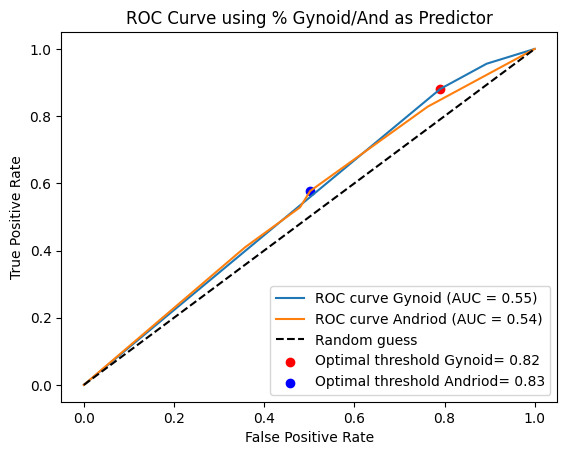

In [37]:
y_proba_ada_gyno= tuned_ada_gyno.predict_proba(X_test_singleG)[:, 1]
y_proba_ada_and= tuned_ada_and.predict_proba(X_test_singleA)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_proba_ada_gyno)
roc_auc = auc(fpr, tpr)
fpr2, tpr2, thresholds2 = roc_curve(y_test, y_proba_ada_and)
roc_auc2 = auc(fpr2, tpr2)

youden_index = tpr - fpr
youden_index2 = tpr2 - fpr2

optimal_idx = np.argmax(youden_index)
optimal_idx2 = np.argmax(youden_index2)

optimal_threshold = thresholds[optimal_idx]
optimal_threshold2 = thresholds2[optimal_idx2]

print("Optimal threshold for percent Gynoid fat (using Youden's Index):", optimal_threshold)
print("Optimal threshold for percent Andriod fat (using Youden's Index):", optimal_threshold2)

plt.figure()
plt.plot(fpr, tpr, label=f'ROC curve Gynoid (AUC = {roc_auc:.2f})')
plt.plot(fpr2, tpr2, label=f'ROC curve Andriod (AUC = {roc_auc2:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random guess')
plt.scatter(fpr[optimal_idx], tpr[optimal_idx], marker='o', color='red',
            label=f'Optimal threshold Gynoid= {optimal_threshold:.2f}')
plt.scatter(fpr2[optimal_idx2], tpr2[optimal_idx2], marker='o', color='blue',
            label=f'Optimal threshold Andriod= {optimal_threshold2:.2f}')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve using % Gynoid/And as Predictor')
plt.legend(loc='lower right')
plt.show()


#***SVM***

In [20]:
svm_pipeline_gyno = Pipeline([
    ('scaler', StandardScaler()),
    ('sampler', SMOTE()),
    ('svm', SVC(probability=True))
])

svm_pipeline_and = Pipeline([
    ('scaler', StandardScaler()),
    ('sampler', SMOTE()),
    ('svm', SVC(probability=True))
])

svm_pipeline_gyno.fit(X_train_singleG, y_train)

svm_pipeline_and.fit(X_train_singleA, y_train)

cross= StratifiedKFold(n_splits=10, shuffle=True, random_state=4)
scores = cross_val_score(svm_pipeline_gyno, X_train_singleG, y_train, cv=cross, scoring='roc_auc')
scoresA = cross_val_score(svm_pipeline_and, X_train_singleA, y_train, cv=cross, scoring='roc_auc')
print(scores)
print(scoresA)

auc_gyno = cross_val_score(svm_pipeline_gyno, X_train_singleG, y_train, cv=cross, scoring='roc_auc')
auc_and = cross_val_score(svm_pipeline_and, X_train_singleA, y_train, cv=cross, scoring='roc_auc')
print(auc_gyno)
print(auc_and)

con_score = cross_val_predict(svm_pipeline_gyno, X_train_singleG, y_train, cv=cross)
con_scoreA = cross_val_predict(svm_pipeline_and, X_train_singleA, y_train, cv=cross)
confusion = confusion_matrix(y_train, con_score)
confusionA = confusion_matrix(y_train, con_scoreA)
print("Confusion Matrix gyno:\n", confusion)
print("Confusion Matrix and:\n", confusionA)

[0.59243762 0.59158977 0.54914224 0.59374304 0.58482521 0.56515253
 0.55136941 0.63081998 0.55875149 0.51952866]
[0.53356163 0.54242551 0.57639455 0.56205745 0.61310399 0.58830995
 0.56930528 0.56662915 0.585551   0.63158127]
[0.59593913 0.59051069 0.55262173 0.59621465 0.58469161 0.56993988
 0.55130261 0.62843682 0.56356194 0.52244141]
[0.53329736 0.53854963 0.58205422 0.56141171 0.61778    0.58416834
 0.57246716 0.56751181 0.59075864 0.63310384]
Confusion Matrix gyno:
 [[2997 1990]
 [ 467  439]]
Confusion Matrix and:
 [[2674 2313]
 [ 355  551]]


In [22]:
f2_scorer = make_scorer(fbeta_score, beta=2, pos_label=1)
f2_svm_train_gyno=cross_val_score(svm_pipeline_gyno, X_train_singleG, y_train, cv=cross, scoring=f2_scorer)
print(f2_svm_train_gyno)

[0.35223368 0.38778878 0.34591195 0.37459283 0.38907285 0.36644951
 0.36605657 0.41245791 0.39494471 0.3030303 ]


In [23]:
f2_scorer = make_scorer(fbeta_score, beta=2, pos_label=1)

svm_tuning_gyno = Pipeline([
    ('scaler', StandardScaler()),
    ('sampler', SMOTE()),
    ('svm', SVC(probability=True))
])

svm_tuning_and = Pipeline([
    ('scaler', StandardScaler()),
    ('sampler', SMOTE()),
    ('svm', SVC(probability=True))
])

param_distt = {
  'sampler': [SMOTE(), RandomUnderSampler(), RandomOverSampler(), SMOTETomek(), BorderlineSMOTE(kind='borderline-1')],
  'svm__C': [0.1, 1, 10, 100],
  'svm__kernel': ['linear', 'rbf'],
  'svm__gamma': ['scale', 'auto'],
  'svm__class_weight': ['balanced', None],
  'svm__tol': [1e-3, 1e-4, 1e-5]
}

distt_g= RandomizedSearchCV(svm_tuning_gyno, param_distt, cv=cross, scoring=f2_scorer,n_iter=10, n_jobs=-1)
best_distt_g=distt_g.fit(X_train_singleG, y_train)
distt_a= RandomizedSearchCV(svm_tuning_and, param_distt, cv=cross, scoring=f2_scorer,n_iter=10, n_jobs=-1)
best_distt_a=distt_a.fit(X_train_singleA, y_train)
print("Best hyperparameters Gyno:", best_distt_g.best_params_)
print("Best hyperparameters And:", best_distt_a.best_params_)

Best hyperparameters Gyno: {'svm__tol': 0.001, 'svm__kernel': 'rbf', 'svm__gamma': 'scale', 'svm__class_weight': 'balanced', 'svm__C': 100, 'sampler': SMOTE()}
Best hyperparameters And: {'svm__tol': 0.0001, 'svm__kernel': 'linear', 'svm__gamma': 'scale', 'svm__class_weight': None, 'svm__C': 0.1, 'sampler': RandomUnderSampler()}


In [24]:
svm_tuned_gyno = Pipeline([
    ('scaler', StandardScaler()),
    ('sampler', SMOTE()),
    ('svm', SVC(probability=True, C=100, class_weight='balanced',gamma='scale', kernel='rbf', tol=0.001))
  ])

svm_tuned_and = Pipeline([
    ('scaler', StandardScaler()),
    ('sampler', RandomUnderSampler()),
    ('svm', SVC(probability=True, C=0.1, class_weight=None,gamma='scale', kernel='linear', tol=0.0001))
    ])

svm_tuned_gyno.fit(X_train_singleG, y_train)

svm_tuned_and.fit(X_train_singleA, y_train)

cross= StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
scores = cross_val_score(svm_tuned_gyno, X_train_singleG, y_train, cv=cross, scoring='roc_auc')
scoresA = cross_val_score(svm_tuned_and, X_train_singleA, y_train, cv=cross, scoring='roc_auc')
print(scores)
print(scoresA)

con_score = cross_val_predict(svm_tuned_gyno, X_train_singleG, y_train, cv=cross)
con_scoreA = cross_val_predict(svm_tuned_and, X_train_singleA, y_train, cv=cross)
confusion = confusion_matrix(y_train, con_score)
confusionA = confusion_matrix(y_train, con_scoreA)

print("Confusion Matrix gyno:\n", confusion)
print("Confusion Matrix and:\n", confusionA)

[0.59472792 0.5810412  0.60303024 0.61235805 0.56419506 0.55675796
 0.57783344 0.52040028 0.5405799  0.6005009 ]
[0.61347971 0.57918034 0.60160981 0.63054999 0.54466711 0.5573703
 0.57680917 0.52185666 0.62882298 0.54550068]
Confusion Matrix gyno:
 [[2397 2590]
 [ 332  574]]
Confusion Matrix and:
 [[2070 2917]
 [ 270  636]]


----------- Test Gyno --------------
Accuracy: 0.5162822252374492

Classification Report:
               precision    recall  f1-score   support

         0.0       0.89      0.49      0.63      1247
         1.0       0.19      0.67      0.30       227

    accuracy                           0.52      1474
   macro avg       0.54      0.58      0.46      1474
weighted avg       0.78      0.52      0.58      1474


Confusion Matrix:
 [[610 637]
 [ 76 151]]
----------- Test And --------------
Accuracy: 0.45115332428765265

Classification Report:
               precision    recall  f1-score   support

         0.0       0.87      0.41      0.56      1247
         1.0       0.17      0.66      0.27       227

    accuracy                           0.45      1474
   macro avg       0.52      0.54      0.42      1474
weighted avg       0.76      0.45      0.52      1474


Confusion Matrix:
 [[515 732]
 [ 77 150]]


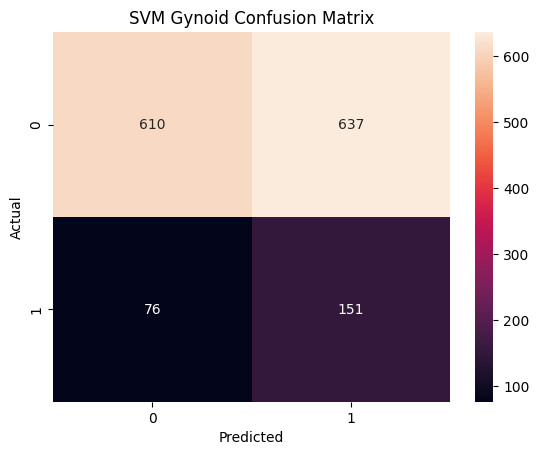

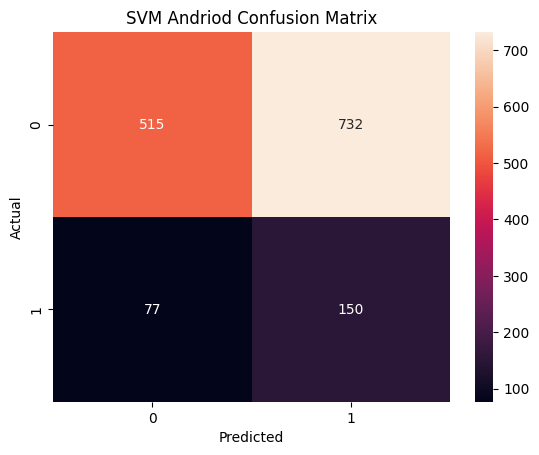

In [25]:
y_pred_svm_gyno = svm_tuned_gyno.predict(X_test_singleG)
y_pred_svm_and = svm_tuned_and.predict(X_test_singleA)

print('----------- Test Gyno --------------')
print("Accuracy:", accuracy_score(y_test, y_pred_svm_gyno))
print("\nClassification Report:\n", classification_report(y_test, y_pred_svm_gyno))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_svm_gyno))

print('----------- Test And --------------')
print("Accuracy:", accuracy_score(y_test, y_pred_svm_and))
print("\nClassification Report:\n", classification_report(y_test, y_pred_svm_and))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_svm_and))

cm_g=confusion_matrix(y_test, y_pred_svm_gyno)
cm_a=confusion_matrix(y_test, y_pred_svm_and)

sns.heatmap(cm_g, annot=True, fmt='d')
plt.title('SVM Gynoid Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

sns.heatmap(cm_a, annot=True, fmt='d')
plt.title('SVM Andriod Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

Optimal threshold for percent Gynoid fat (using Youden's Index): 0.4922039486308102
Optimal threshold for percent Andriod fat (using Youden's Index): 0.5191828597133432


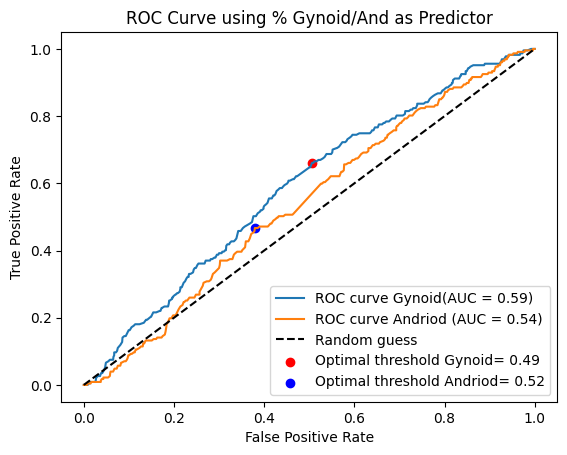

In [26]:
y_proba_svm_gyno= svm_tuned_gyno.predict_proba(X_test_singleG)[:, 1]
y_proba_svm_and= svm_tuned_and.predict_proba(X_test_singleA)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_proba_svm_gyno)
roc_auc = auc(fpr, tpr)

fpr2, tpr2, thresholds2 = roc_curve(y_test, y_proba_svm_and)
roc_auc2 = auc(fpr2, tpr2)

youden_index = tpr - fpr
youden_index2 = tpr2 - fpr2

optimal_idx = np.argmax(youden_index)
optimal_idx2 = np.argmax(youden_index2)

optimal_threshold = thresholds[optimal_idx]
optimal_threshold2 = thresholds2[optimal_idx2]

print("Optimal threshold for percent Gynoid fat (using Youden's Index):", optimal_threshold)
print("Optimal threshold for percent Andriod fat (using Youden's Index):", optimal_threshold2)

plt.figure()
plt.plot(fpr, tpr, label=f'ROC curve Gynoid(AUC = {roc_auc:.2f})')
plt.plot(fpr2, tpr2, label=f'ROC curve Andriod (AUC = {roc_auc2:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random guess')
plt.scatter(fpr[optimal_idx], tpr[optimal_idx], marker='o', color='red',
            label=f'Optimal threshold Gynoid= {optimal_threshold:.2f}')
plt.scatter(fpr2[optimal_idx2], tpr2[optimal_idx2], marker='o', color='blue',
            label=f'Optimal threshold Andriod= {optimal_threshold2:.2f}')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve using % Gynoid/And as Predictor')
plt.legend(loc='lower right')
plt.show()


#***Final Plot***

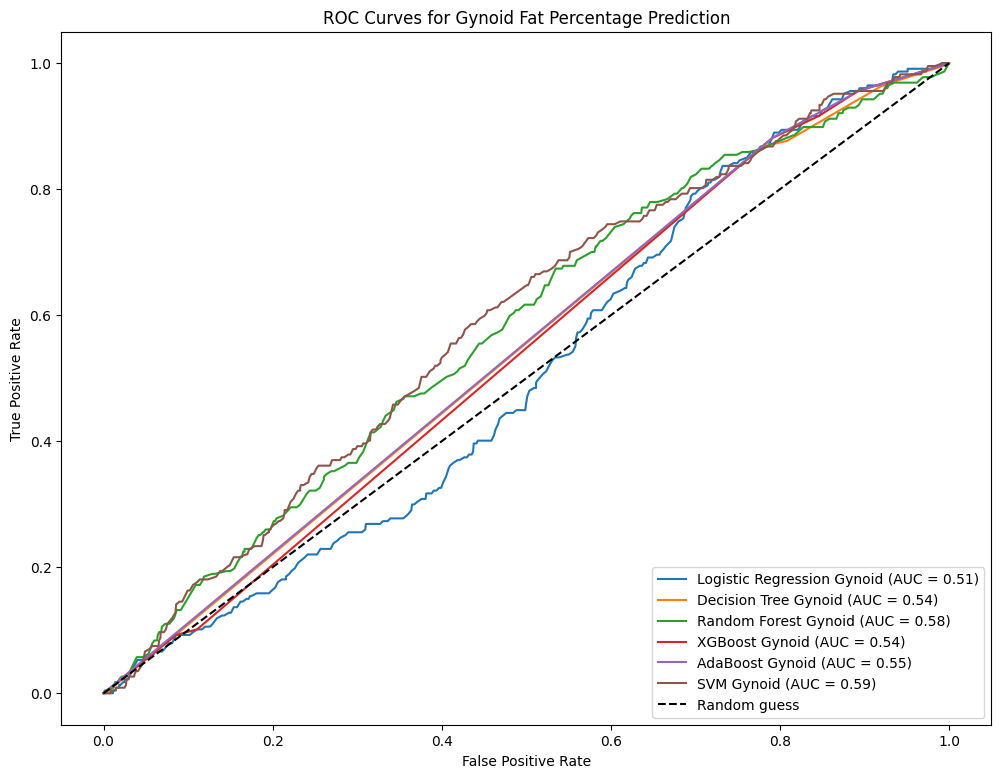

In [69]:
plt.figure(figsize=(12, 9))

fpr_log, tpr_log, thresholds_log = roc_curve(y_test, y_proba_log_gyno)
roc_auc_log = auc(fpr_log, tpr_log)
plt.plot(fpr_log, tpr_log, label=f'Logistic Regression Gynoid (AUC = {roc_auc_log:.2f})')

fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_test, y_proba_dt_gyno)
roc_auc_dt = auc(fpr_dt, tpr_dt)
plt.plot(fpr_dt, tpr_dt, label=f'Decision Tree Gynoid (AUC = {roc_auc_dt:.2f})')

fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_proba_rf_gyno)
roc_auc_rf = auc(fpr_rf, tpr_rf)
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest Gynoid (AUC = {roc_auc_rf:.2f})')

fpr_xgb, tpr_xgb, thresholds_xgb = roc_curve(y_test, y_proba_xgb_gyno)
roc_auc_xgb = auc(fpr_xgb, tpr_xgb)
plt.plot(fpr_xgb, tpr_xgb, label=f'XGBoost Gynoid (AUC = {roc_auc_xgb:.2f})')

fpr_ada, tpr_ada, thresholds_ada = roc_curve(y_test, y_proba_ada_gyno)
roc_auc_ada = auc(fpr_ada, tpr_ada)
plt.plot(fpr_ada, tpr_ada, label=f'AdaBoost Gynoid (AUC = {roc_auc_ada:.2f})')

fpr_svm, tpr_svm, thresholds_svm = roc_curve(y_test, y_proba_svm_gyno)
roc_auc_svm = auc(fpr_svm, tpr_svm)
plt.plot(fpr_svm, tpr_svm, label=f'SVM Gynoid (AUC = {roc_auc_svm:.2f})')

plt.plot([0, 1], [0, 1], 'k--', label='Random guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Gynoid Fat Percentage Prediction')
plt.legend(loc='lower right')
plt.show()

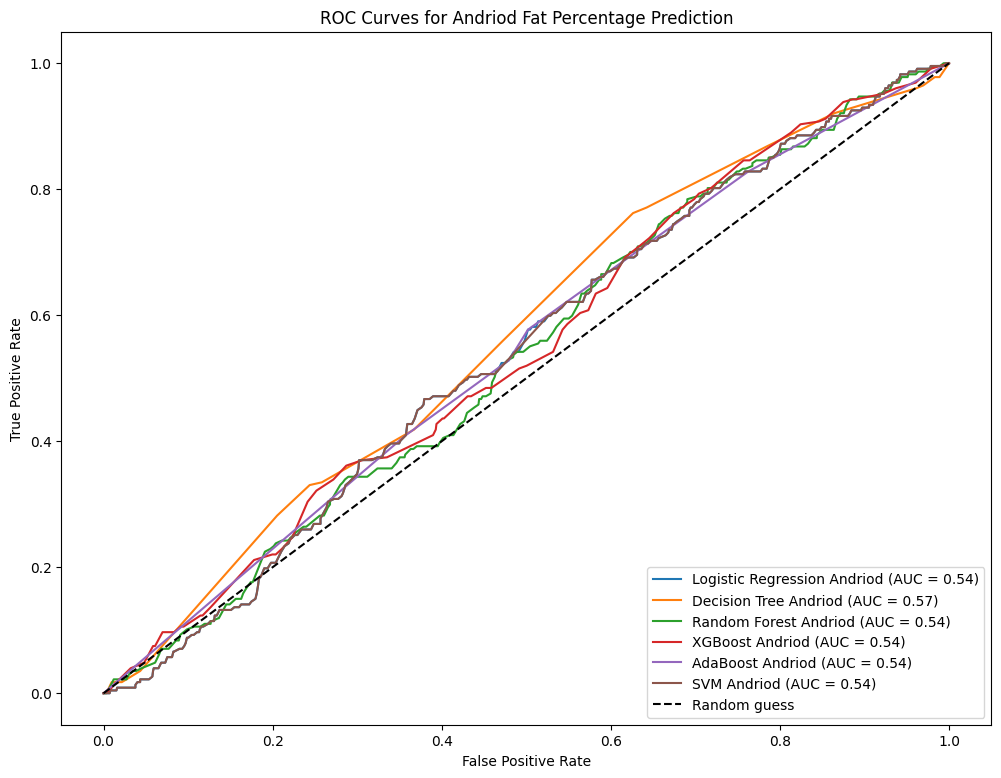

In [67]:
plt.figure(figsize=(12, 9))

fpr_log, tpr_log, thresholds_log = roc_curve(y_test, y_proba_log_and)
roc_auc_log = auc(fpr_log, tpr_log)
plt.plot(fpr_log, tpr_log, label=f'Logistic Regression Andriod (AUC = {roc_auc_log:.2f})')

fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_test, y_proba_dt_and)
roc_auc_dt = auc(fpr_dt, tpr_dt)
plt.plot(fpr_dt, tpr_dt, label=f'Decision Tree Andriod (AUC = {roc_auc_dt:.2f})')

fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_proba_rf_and)
roc_auc_rf = auc(fpr_rf, tpr_rf)
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest Andriod (AUC = {roc_auc_rf:.2f})')

fpr_xgb, tpr_xgb, thresholds_xgb = roc_curve(y_test, y_proba_xgb_and)
roc_auc_xgb = auc(fpr_xgb, tpr_xgb)
plt.plot(fpr_xgb, tpr_xgb, label=f'XGBoost Andriod (AUC = {roc_auc_xgb:.2f})')

fpr_ada, tpr_ada, thresholds_ada = roc_curve(y_test, y_proba_ada_and)
roc_auc_ada = auc(fpr_ada, tpr_ada)
plt.plot(fpr_ada, tpr_ada, label=f'AdaBoost Andriod (AUC = {roc_auc_ada:.2f})')

fpr_svm, tpr_svm, thresholds_svm = roc_curve(y_test, y_proba_svm_and)
roc_auc_svm = auc(fpr_svm, tpr_svm)
plt.plot(fpr_svm, tpr_svm, label=f'SVM Andriod (AUC = {roc_auc_svm:.2f})')

plt.plot([0, 1], [0, 1], 'k--', label='Random guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Andriod Fat Percentage Prediction')
plt.legend(loc='lower right')
plt.show()


In [70]:


# Calculate f2 scores
f2_log_gyno = fbeta_score(y_test, y_pred_log_gyno, beta=2, pos_label=1)
f2_dt_gyno = fbeta_score(y_test, y_pred_dt_gyno, beta=2, pos_label=1)
f2_rf_gyno = fbeta_score(y_test, y_pred_rf_gyno, beta=2, pos_label=1)
f2_xgb_gyno = fbeta_score(y_test, y_pred_xgb_gyno, beta=2, pos_label=1)
f2_ada_gyno = fbeta_score(y_test, y_pred_ada_gyno, beta=2, pos_label=1)
f2_svm_gyno = fbeta_score(y_test, y_pred_svm_gyno, beta=2, pos_label=1)

f2_log_and = fbeta_score(y_test, y_pred_log_and, beta=2, pos_label=1)
f2_dt_and = fbeta_score(y_test, y_pred_dt_and, beta=2, pos_label=1)
f2_rf_and = fbeta_score(y_test, y_pred_rf_and, beta=2, pos_label=1)
f2_xgb_and = fbeta_score(y_test, y_pred_xgb_and, beta=2, pos_label=1)
f2_ada_and = fbeta_score(y_test, y_pred_ada_and, beta=2, pos_label=1)
f2_svm_and = fbeta_score(y_test, y_pred_svm_and, beta=2, pos_label=1)



print(f"Logistic Regression Gynoid F2 Score: {f2_log_gyno}")
print(f"Decision Tree Gynoid F2 Score: {f2_dt_gyno}")
print(f"Random Forest Gynoid F2 Score: {f2_rf_gyno}")
print(f"XGBoost Gynoid F2 Score: {f2_xgb_gyno}")
print(f"AdaBoost Gynoid F2 Score: {f2_ada_gyno}")
print(f"SVM Gynoid F2 Score: {f2_svm_gyno}")

print(f"Logistic Regression Android F2 Score: {f2_log_and}")
print(f"Decision Tree Android F2 Score: {f2_dt_and}")
print(f"Random Forest Android F2 Score: {f2_rf_and}")
print(f"XGBoost Android F2 Score: {f2_xgb_and}")
print(f"AdaBoost Android F2 Score: {f2_ada_and}")
print(f"SVM Android F2 Score: {f2_svm_and}")

Logistic Regression Gynoid F2 Score: 0.33272837265577737
Decision Tree Gynoid F2 Score: 0.4742416947520462
Random Forest Gynoid F2 Score: 0.44100801832760594
XGBoost Gynoid F2 Score: 0.4775549188156638
AdaBoost Gynoid F2 Score: 0.4775549188156638
SVM Gynoid F2 Score: 0.44516509433962265
Logistic Regression Android F2 Score: 0.3992953611274222
Decision Tree Android F2 Score: 0.46455424274973145
Random Forest Android F2 Score: 0.39039907460960094
XGBoost Android F2 Score: 0.3470031545741325
AdaBoost Android F2 Score: 0.4592085979482169
SVM Android F2 Score: 0.41899441340782123
